**Analysis of the salaries data set**

Import of Libraries:

In [14]:
# Make inline plots vector graphics
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("pdf", "svg")

# Plotting setup
import matplotlib.pyplot as plt

# Package imports
import numpy as np
import pandas as pd
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Analysis tools
import salaries_and_world_preprocessing as pre
from sklearn.linear_model import LinearRegression


C:\Users\timwe\AppData\Local\Temp/ipykernel_15144/19607529.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("pdf", "svg")


In [15]:
world_data, salaries_data, countries_data = pre.load_data()
salaries_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,SE,FT,Cyber Security Architect,110000,EUR,130026,NL,100,NL,L
1,2021,SE,FT,Software Engineer,50000,EUR,59102,FR,50,FR,L
2,2021,MI,FT,Front End Engineer,36000,USD,36000,AR,100,IL,S
3,2022e,SE,CT,Frontend Developer,128000,USD,128000,SK,100,US,S
4,2021,SE,FT,Web Developer,124800,USD,124800,US,100,US,L


First look at data:

In [31]:
salaries = pre.complete_preprocessing(world_data, salaries_data, countries_data)
salaries.head()


c:\Users\timwe\VisualStudio\Data-Litaracy-Project\src\salaries_and_world_preprocessing.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_data['gdp_per_capita'] = (gdp_data['gdp_md_est'] / gdp_data['pop_est'] * 1000000)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,company_location_iso_a3,employee_residence_iso_a3,gdp_company_location,gdp_employee_residence,same_country,ai_or_ml_job
0,2021,3,FT,Cyber Security Architect,110000,EUR,130026,100,3,NLD,NLD,50969.524287,50969.524287,1.0,0.0
1,2021,1,FT,Cyber Security Analyst,75000,EUR,88654,100,3,NLD,NLD,50969.524287,50969.524287,1.0,0.0
2,2021,2,FT,Product Designer,40000,EUR,47282,100,2,NLD,NLD,50969.524287,50969.524287,1.0,0.0
3,2021,2,FT,Chief Information Security Officer,40000,USD,40000,50,3,NLD,NLD,50969.524287,50969.524287,1.0,0.0
4,2020,4,PT,Director of Infrastructure,86000,EUR,98080,50,2,NLD,NLD,50969.524287,50969.524287,1.0,0.0


**Preprocessing of the data**

In [17]:
#Try to find best job_title predictor
#TODO Change preprocessing for ai_or_ml_job or maybe Software in preprocessing file in order
# to achieve distinguishable means which could be used as a predictor
salary_per_job = salaries[["ai_or_ml_job", "salary_in_usd"]].groupby("ai_or_ml_job").mean()
salary_per_job["salary_in_usd"].sort_values(ascending=False).head()
#plt.plot(salary_per_job.index, salary_per_job.values)

ai_or_ml_job
0.0    107105.619516
1.0    103906.783784
Name: salary_in_usd, dtype: float64

In [32]:
#Preparation for regression
salaries = salaries.dropna()
salaries = salaries[["ai_or_ml_job","salary_in_usd", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_employee_residence"]]

#Experiment: Is relationship between salary and gdp maybe quadratic?
#print(salaries["gdp_employee_residence"])
#salaries["gdp_employee_residence"] = salaries["gdp_employee_residence"] ** 2
#print(salaries["gdp_employee_residence"])
#Result: r2 square almost the same but lower by 2* 10^-4 ==> Leave everything as it is

salaries_norm = ((salaries - salaries.mean()) /salaries.std())



In [33]:
#Calculate regression coefficients
X = salaries_norm[["ai_or_ml_job", "experience_level","work_year","company_size", "same_country","remote_ratio","gdp_employee_residence"]]
X = X.to_numpy()
y = salaries_norm["salary_in_usd"].values

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,7), y)
print(reg.coef_)
r2_score = reg.score(X.reshape(-1,7), y)
print(r2_score)


[ 0.08199533  0.41737513  0.00881578  0.04722893 -0.07772954  0.04065482
  0.45334822]
0.3962371177822086


[-0.40276853 -0.40276853 -0.40276853 ... -0.40276853 -0.40276853
 -0.40276853]


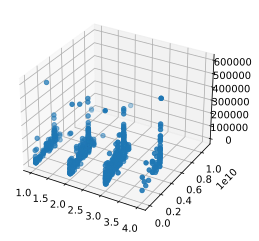

In [23]:
#3D Plot
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
print(X[:,0])
ax.scatter(salaries["experience_level"], salaries["gdp_employee_residence"], salaries["salary_in_usd"])

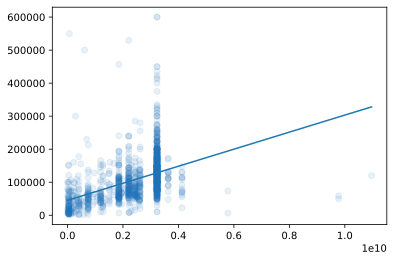

In [10]:
#Plot linear regression of highest correlated attribute
X = salaries["gdp_employee_residence"].to_numpy()
y = salaries["salary_in_usd"].values
X_stacked = np.column_stack([X, np.ones_like(y)])

x_ = np.linspace(X.min(), X.max(), 100+1)

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))
plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1)
plt.show()



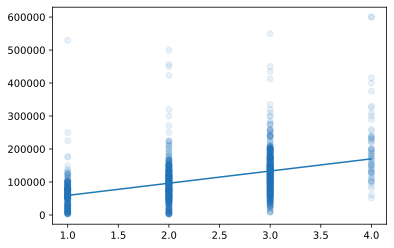

In [ ]:
#Plot linear regression of highest correlated attribute
X = salaries["experience_level"].to_numpy()
y = salaries["salary_in_usd"].values
X_stacked = np.column_stack([X, np.ones_like(y)])

x_ = np.linspace(X.min(), X.max(), 100+1)

reg = LinearRegression(fit_intercept=True).fit(X.reshape(-1,1), y)
y_pred_sklearn = reg.predict(x_.reshape(-1,1))
plt.plot(x_, y_pred_sklearn)
plt.scatter(X,y, alpha=0.1)
plt.show()
